In [2]:
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

import pandas as pd 
import seaborn as sns
from matplotlib import gridspec 

In [3]:
data = pd.read_csv("creditcard.csv")
df = data

# Data cleaning

In [4]:
corr =df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


Text(0.5,1,'Correlation heatmap ')

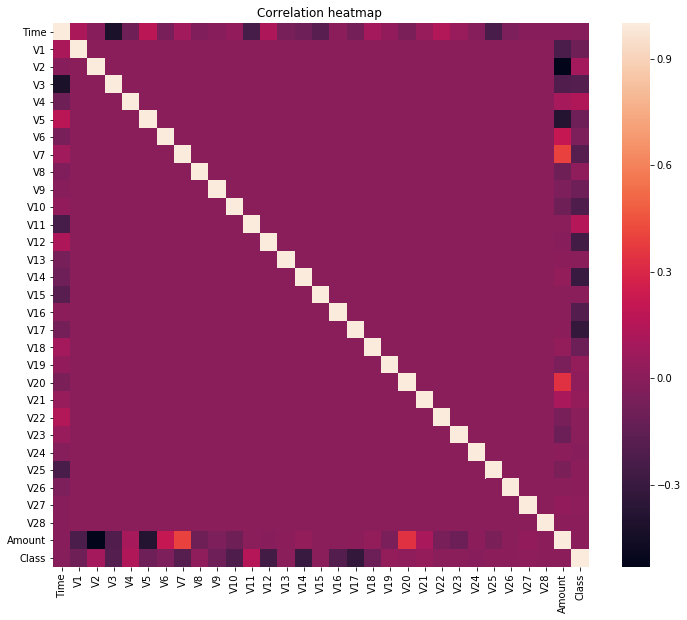

In [5]:
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data = corr)
plt.title('Correlation heatmap ')

In [6]:
#skewness
skew_ = df.skew()
skew_

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler2 = StandardScaler()

scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [8]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [9]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
53728,46120.0,1.271490,0.095668,-0.069079,0.138052,0.400603,0.572674,-0.169764,0.184765,-0.078890,...,-0.010063,-1.355587,0.285980,0.192268,-0.019997,-0.009171,0.89,0,-0.349671,-1.025392
199104,132811.0,2.073250,0.035052,-1.100884,0.369923,0.038284,-1.100023,0.265826,-0.395976,0.364109,...,0.306952,-0.076456,-0.236862,0.200914,-0.062866,-0.058741,1.98,0,-0.345313,0.800141
135394,81233.0,-0.261435,2.336472,-1.792061,1.152872,1.309618,-1.179851,1.379064,-0.632731,0.860087,...,0.042871,-0.138023,-0.434789,-0.519458,-0.148147,-0.872988,0.89,0,-0.349671,-0.285985
7360,9908.0,1.297192,0.043844,-0.960130,-0.344571,2.093570,3.319126,-0.613144,0.724848,1.230938,...,0.105861,0.931664,0.342236,0.070601,-0.057115,0.007340,12.99,0,-0.301294,-1.787941
177158,123063.0,-0.842262,-2.010346,-0.266068,-0.826092,1.411195,-1.597721,-0.704464,-0.049871,-0.975519,...,0.572162,0.585387,-1.104350,-0.107604,0.180477,0.319303,103.08,0,0.058893,0.594868


In [10]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
162426,1.969941,-0.562873,-0.708739,0.308716,-0.326331,0.074525,-0.591174,0.022238,1.545401,-0.187226,...,0.625118,-0.034622,-1.037776,0.012305,-0.148701,0.036330,-0.041301,0,-0.169357,0.427331
234718,1.854271,-0.294102,0.168284,1.406261,-0.812774,-0.276285,-0.627143,-0.003571,1.051491,0.105659,...,0.368615,0.232163,0.001162,-0.323374,-0.762768,0.076579,-0.011543,0,-0.173316,1.121674
120640,-1.716565,-0.068146,1.466991,0.550560,-1.110302,-0.143297,-0.677198,0.543659,-0.781817,0.734241,...,0.274277,0.034958,0.373282,-0.257347,-0.194674,-0.132477,0.360627,0,-0.159322,-0.398202
137864,-0.021059,-0.636609,1.126786,-2.467330,-0.445872,1.138862,-0.677817,0.347013,-2.307068,1.077595,...,-0.374501,-0.080917,-1.763734,-0.148414,-0.253565,0.071475,0.007524,0,-0.152126,-0.262231
45552,1.121610,-0.971222,0.891826,-0.619357,-1.563269,-0.584863,-0.846107,0.021754,-0.766825,0.719330,...,0.351876,-0.033759,0.538732,0.164712,-0.338330,0.005785,0.036801,0,0.108150,-1.103748


In [11]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256141, 31)
Test Shape: (28666, 31)


In [13]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [16]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
valideq = valid.sample(len(fraud.index))
frames = [fraud, valideq]
df_sample = pd.concat(frames)
df_sample = df_sample.sample(frac=1).reset_index(drop=True)
print("Fraud Case:",len(fraud))
print("Genuine Case:",len(valid))

Fraud Case: 492
Genuine Case: 284315


In [17]:
df_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,-5.533443,...,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,1,-0.350151,1.287716
1,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,-15.231833,...,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,1,-0.313968,0.050984
2,0.215267,0.278290,-0.852571,-2.527224,0.820602,-1.489200,1.019914,-0.409082,1.116710,-1.325952,...,0.047267,-0.054985,-0.640294,-0.604319,-0.464933,-0.014377,0.126836,0,-0.344753,1.451989
3,1.051556,-1.064299,-0.107048,-0.692384,-0.913883,-0.601232,-0.247497,-0.155132,-1.121043,0.747714,...,0.486489,-0.325642,0.054077,0.569959,-0.132862,-0.046416,0.028590,0,0.425798,-1.333637
4,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1,-0.346872,1.121106


In [18]:
df_sample.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-2.360662,1.807832,-3.548726,2.195651,-1.583469,-0.686735,-2.734675,0.253532,-1.267766,-2.854210,...,0.004522,-0.023458,-0.046415,0.013289,0.032634,0.100187,0.032821,0.500000,0.093060,-0.151186
std,5.518768,3.741054,6.208440,3.267926,4.227885,1.809174,5.906891,4.865167,2.339191,4.525754,...,1.178312,1.174003,0.573584,0.683716,0.495196,1.010253,0.454686,0.500254,1.252083,1.025133
min,-30.552380,-25.663628,-31.103685,-3.805610,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-8.887017,-19.254328,-2.028024,-4.781606,-1.732008,-7.263482,-6.390338,0.000000,-0.353229,-1.991845
25%,-2.788129,-0.134117,-5.084967,-0.237910,-1.794014,-1.602861,-3.066415,-0.239763,-2.275629,-4.572043,...,-0.532923,-0.227366,-0.405859,-0.314823,-0.282804,-0.055061,-0.057886,0.000000,-0.349231,-1.022570
50%,-0.775685,0.962214,-1.461795,1.330730,-0.400635,-0.696185,-0.611833,0.118726,-0.674555,-0.913581,...,0.003557,-0.032223,0.010781,0.070538,-0.007054,0.058112,0.030711,0.500000,-0.288300,-0.267454
75%,1.060320,2.798885,0.315807,4.250632,0.482746,0.050171,0.293614,0.855025,0.156408,-0.011973,...,0.593022,0.190727,0.382373,0.387768,0.344400,0.455390,0.220976,1.000000,0.046539,0.848274
max,2.319370,22.057729,2.922444,12.114672,11.095089,9.410864,18.585729,20.007208,5.894874,8.884178,...,8.361985,5.466230,1.210315,2.208209,2.745261,5.866955,1.779364,1.000000,26.245598,1.640373


Text(0.5,0,'Class (0:Non-fraudulent, 1:Fraudulent)')

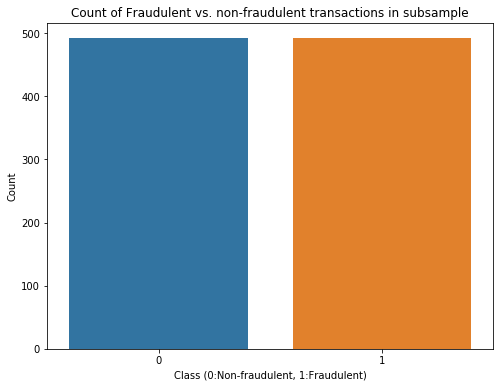

In [189]:
new_counts = df_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y = new_counts)
plt.title('Count of Fraudulent vs. non-fraudulent transactions in subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-fraudulent, 1:Fraudulent)')


# Model with Equal Probability of Class

In [20]:
corr = df_sample.corr()
corr = corr[['Class']]
# corr

# Oultiers Removal

In [153]:
Q1 = df_sample.quantile(0.25)
Q3 = df_sample.quantile(0.75)

IQR = Q3 - Q1

df_sample2 = df_sample[~((df_sample < (Q1 - 2.5*IQR)) | (df_sample>(Q3+2.5*IQR))).any(axis=1)]

In [22]:
len_af = len(df_sample2)
len_bf = len(df_sample)

len_diff = len_bf-len_af
print(len_diff)

282


# Dimensionality Reduction With t-SNE for Visualization

In [23]:
from sklearn.manifold import TSNE

x = df_sample2.drop('Class', axis=1)
y = df_sample2['Class']
print(y)

0      1
2      0
3      0
4      1
5      0
7      0
9      0
10     1
11     0
12     0
13     1
14     1
15     0
16     1
17     1
18     1
19     1
21     1
22     0
23     0
24     1
25     0
26     0
27     1
28     0
29     0
32     0
35     0
36     1
37     0
      ..
943    0
944    1
946    0
947    1
948    1
950    0
951    0
952    0
953    1
956    0
958    0
959    1
960    0
961    0
962    0
963    1
968    1
969    0
970    0
971    1
972    1
973    0
974    1
975    0
976    1
977    1
978    0
979    0
981    1
983    0
Name: Class, Length: 702, dtype: int64


In [24]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(x.values)

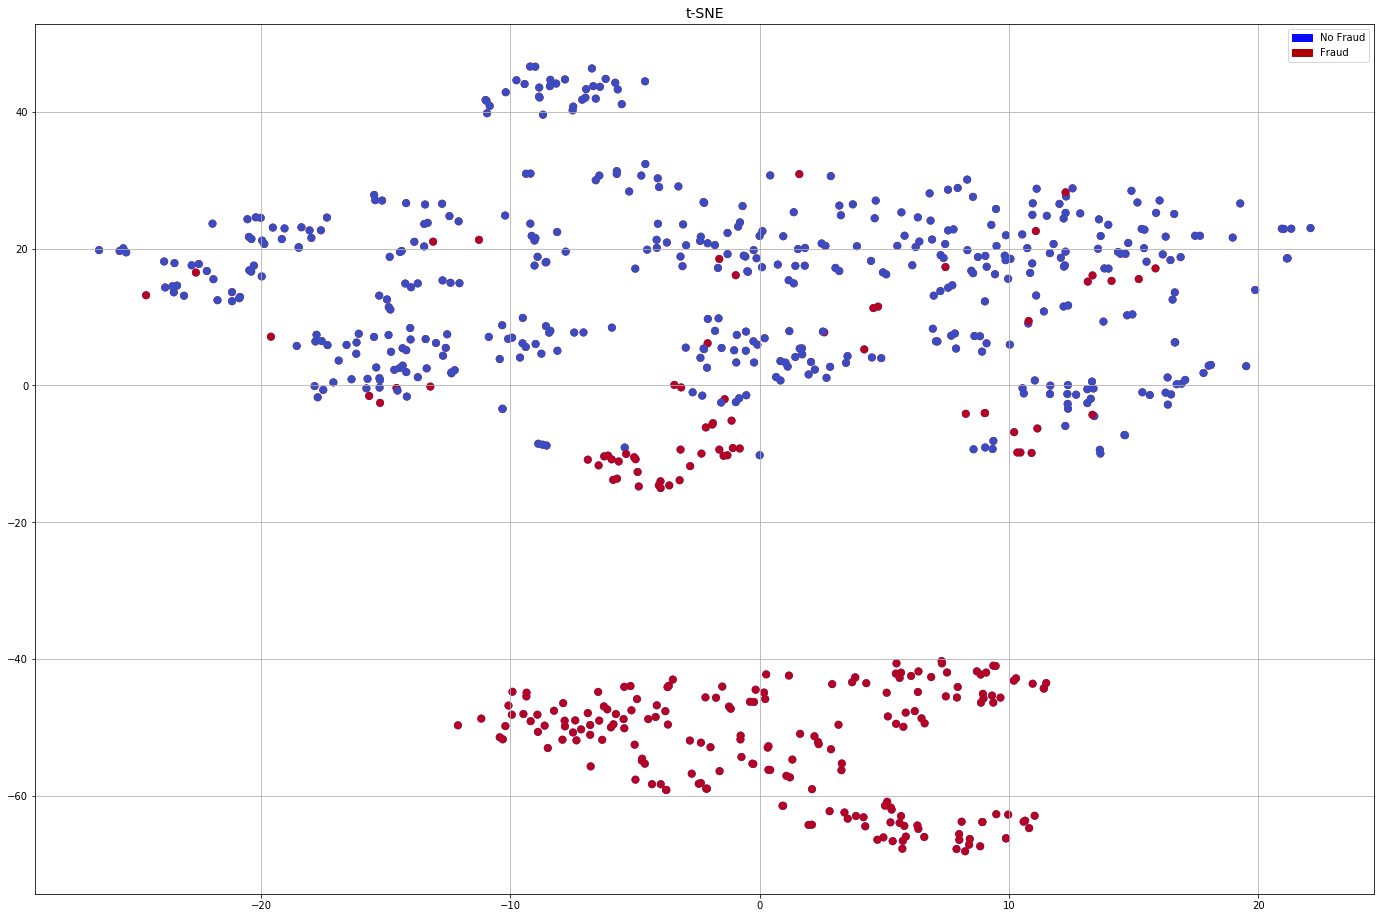

In [25]:
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [26]:
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

In [57]:
df_sample2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,-5.533443,...,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,1,-0.350151,1.287716
2,0.215267,0.278290,-0.852571,-2.527224,0.820602,-1.489200,1.019914,-0.409082,1.116710,-1.325952,...,0.047267,-0.054985,-0.640294,-0.604319,-0.464933,-0.014377,0.126836,0,-0.344753,1.451989
3,1.051556,-1.064299,-0.107048,-0.692384,-0.913883,-0.601232,-0.247497,-0.155132,-1.121043,0.747714,...,0.486489,-0.325642,0.054077,0.569959,-0.132862,-0.046416,0.028590,0,0.425798,-1.333637
4,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1,-0.346872,1.121106
5,2.248797,-0.672174,-1.631867,-0.966740,-0.163576,-0.957401,-0.160766,-0.404743,-0.498882,0.775414,...,0.013792,0.082683,-0.691824,0.099125,-0.237366,-0.040304,-0.067550,0,-0.253277,0.955443


# Normalization

In [55]:
df_scaled = normalize(df_sample2)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.057196,0.231589,-0.396515,0.364312,-0.007972,-0.131763,-0.151222,0.077280,-0.207913,-0.263434,...,-0.026513,0.009162,-0.033258,0.001190,0.024516,0.018001,-0.002530,0.047608,-0.016670,0.061305
1,0.045908,0.059349,-0.181821,-0.538962,0.175003,-0.317590,0.217509,-0.087242,0.238152,-0.282775,...,0.010080,-0.011726,-0.136551,-0.128879,-0.099153,-0.003066,0.027049,0.000000,-0.073523,0.309654
2,0.290116,-0.293632,-0.029534,-0.191023,-0.252133,-0.165875,-0.068283,-0.042800,-0.309287,0.206289,...,0.134219,-0.089842,0.014920,0.157247,-0.036656,-0.012806,0.007888,0.000000,0.117474,-0.367940
3,0.091338,0.197460,-0.393574,0.386893,0.104787,-0.104464,-0.065079,0.008911,-0.199031,-0.231903,...,-0.030844,-0.011184,-0.001363,0.045783,0.013970,0.033903,0.020311,0.072415,-0.025119,0.081184
4,0.505413,-0.151070,-0.366759,-0.217273,-0.036763,-0.215174,-0.036132,-0.090965,-0.112123,0.174273,...,0.003100,0.018583,-0.155486,0.022278,-0.053348,-0.009058,-0.015182,0.000000,-0.056924,0.214734


# PCA

In [128]:
pca = PCA(n_components= 2)
df_scaled = pca.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['P1','P2']

# K-Means Clustering

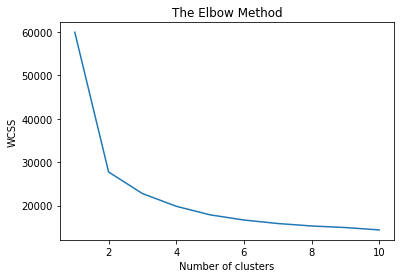

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_sample2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_sample2)
X = df_scaled.iloc[:,: ].values


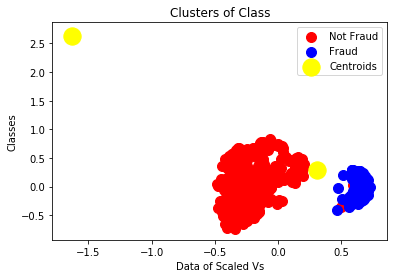

In [32]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Not Fraud')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Fraud')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Class')
plt.xlabel('Data of Scaled Vs')
plt.ylabel('Classes')
plt.legend()
plt.show()

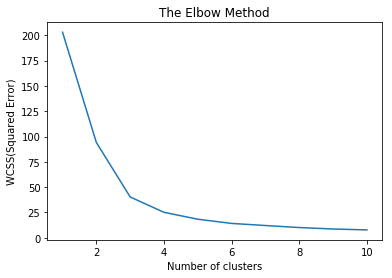

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(Squared Error)')
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(df_scaled)
X = df_scaled.iloc[:,: ].values


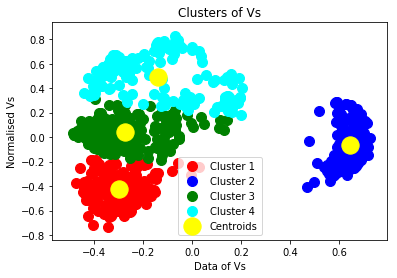

In [46]:
plt.scatter(X[y_kmeans1 == 0, 0], X[y_kmeans1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans1 == 1, 0], X[y_kmeans1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans1 == 2, 0], X[y_kmeans1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans1== 3, 0], X[y_kmeans1 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Vs')
plt.xlabel('Data of Vs')
plt.ylabel('Normalised Vs')
plt.legend()
plt.show()

# DBSCAN

In [1]:
#DBSCAN
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets

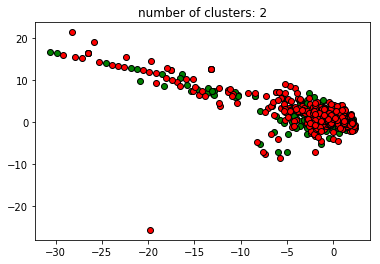

In [184]:
db = DBSCAN(eps=1, min_samples=50).fit(df_sample2.iloc[:, -3:].values) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
n_clusters_ =2
unique_labels = set(labels) 
colors = [ 'g', 'r'] 
labels1=["Fraud",'Non Fraud']
Xnew=X[:702]
for k, col in zip(unique_labels, colors): 
    if k == -1: 
 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = Xnew[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6,label=labels1[k]) 
  
    xy = Xnew[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6,label=labels1[k]) 
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

In [192]:
db_test=db.fit_predict(df_sample2)

# Dendrogram

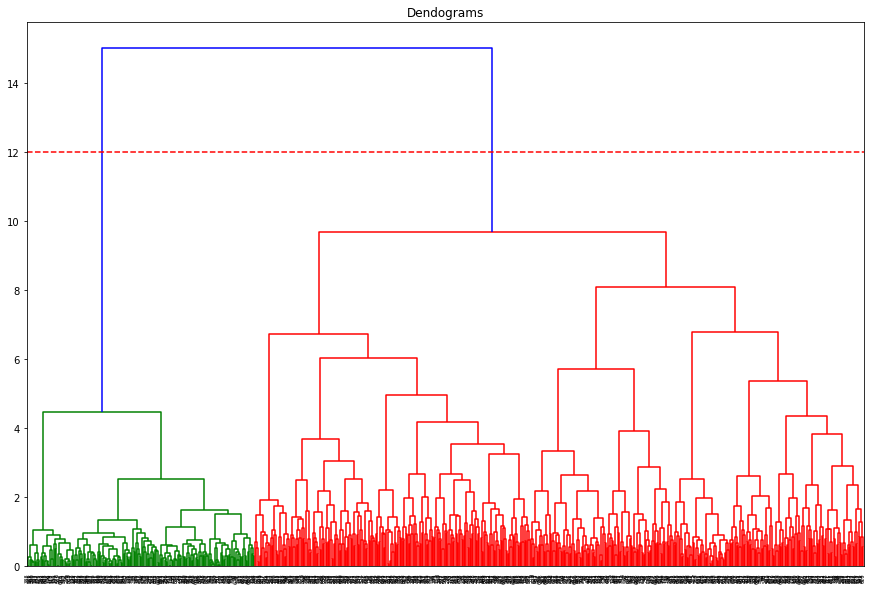

In [125]:
plt.figure(figsize=(15,10))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=12, color ='r', linestyle='--')

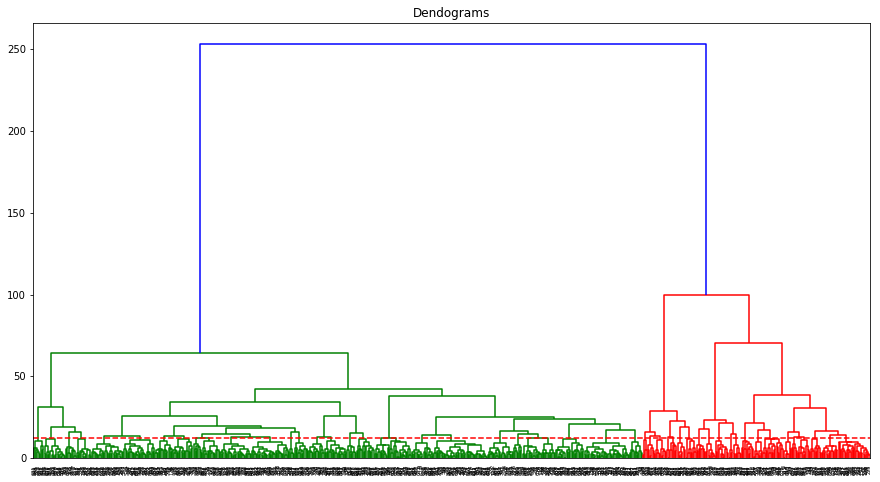

In [126]:
plt.figure(figsize=(15,8))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(df_sample2, method='ward'))
plt.axhline(y=12, color ='r', linestyle='--')

In [186]:
k = [2,3]
ac2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
ac3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  


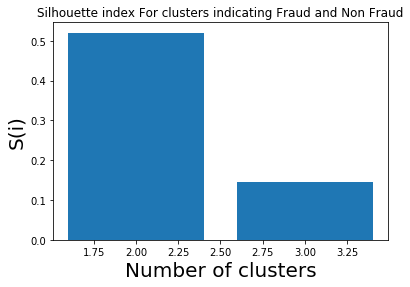

In [187]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []
silhouette_scores.append(silhouette_score(df_sample2, ac2.fit_predict(df_scaled)))
silhouette_scores.append(silhouette_score(df_sample2, ac3.fit_predict(df_scaled)))

plt.bar(k, silhouette_scores ) 
plt.title("Silhouette index For clusters indicating Fraud and Non Fraud")
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

In [188]:
#optimal clusters=2

# AgglomerativeClustering

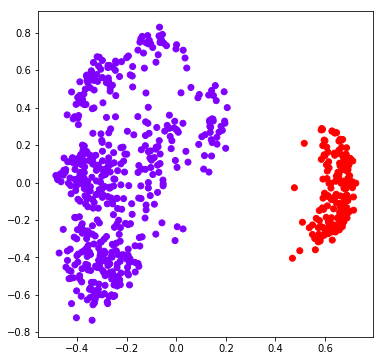

In [130]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
clu_pred = cluster.fit_predict(df_scaled)
# print(clu_pred)
plt.figure(figsize=(6,6))
plt.scatter(df_scaled['P1'], df_scaled['P2'], c = clu_pred, cmap='rainbow')
plt.show()

In [191]:
from sklearn.metrics import confusion_matrix, precision_score ,accuracy_score
confusion_matrix(clu_pred, df_sample2['Class'])
p1 = precision_score(clu_pred, df_sample2['Class'])
a1=  accuracy_score(clu_pred,df_sample2['Class'])
print('Precision: ', p1*100,'%')
print('Accuracy: ', a1*100,'%')

Precision:  73.74517374517374 %
Accuracy:  90.31339031339031 %


# XGB Classifier

In [ ]:
# XGB Classifier
X_train = df_sample2.drop(['Class', 'scaled_amount','scaled_time'],axis=1)
y_train = df_sample2['Class'].astype(bool)

In [200]:
from xgboost import XGBClassifier
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=300)

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=300, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [201]:
X_test = df.drop(['Class', 'scaled_amount','scaled_time'],axis=1)
y_test = df['Class'].astype(bool)

In [202]:
X_test=X_test[:1000]
y_test=y_test[:1000]

In [203]:
y_preds = clf.predict_proba(X_test)[:,1] 

In [204]:
feature_important = clf.get_booster().get_score(importance_type="weight")
keys = list(feature_important.keys())
values = list(feature_important.values())

In [205]:
X_test['Predicted']=np.round(y_preds)

In [206]:
X_test['Actual']=df['Class']

In [207]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Predicted,Actual
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.0,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0.0,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.0,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.0,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0.0,0


In [208]:
comparison_column=np.where(X_test["Predicted"]==X_test['Actual'],True,False)

In [209]:
(unique,counts)=np.unique(comparison_column,return_counts=True)

In [212]:
print("Fraud Detection counts:",counts[0])
print("Non Fraud  counts:",counts[1])

Fraud Detection counts: 27
Non Fraud  counts: 973


In [213]:
from sklearn import metrics
conf=metrics.confusion_matrix(X_test['Actual'],X_test['Predicted'])

In [214]:
conf

array([[971,  27],
       [  0,   2]], dtype=int64)

In [215]:
(unique,counts)=np.unique(df['Class'],return_counts=True)

In [216]:
counts

array([284315,    492], dtype=int64)

In [217]:
unique

array([0, 1], dtype=int64)

In [218]:
X_test1=df.loc[df['Class'] == 1].drop(['Class', 'scaled_amount','scaled_time'],axis=1)

In [219]:
y_preds = clf.predict_proba(X_test1)[:,1] 

In [225]:
X_test2=df.loc[df['Class'] == 1].drop(['V1','V2','V3','V4','V5','V6','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','scaled_amount','scaled_time'],axis=1)
conf=metrics.confusion_matrix(X_test2,np.round(y_preds))
p2 = precision_score(X_test2,np.round(y_preds))
a2=  accuracy_score(X_test2,np.round(y_preds))

In [240]:
print('Precision: ', p2*100,'%')
print('Accuracy: ', a2*100,'%')

Precision:  100.0 %
Accuracy:  96.54471544715447 %
